In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
import seaborn as sns

In [252]:
#Import csv file using panda dataframe function

In [381]:
Covid = pd.read_csv('predict_death_due_to_covid_cleaned.csv')
Covid.head()

,Unnamed: 0,hosp_yn,death_yn,Date,Laboratory-confirmed case,Probable Case,0 - 9 Years,10 - 19 Years,20 - 29 Years,30 - 39 Years,...,Aug,Feb,Jan,July,June,March,May,Nov,Oct,Sept
0,5338266,0,0,13,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,6061035,1,0,10,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3620311,0,0,20,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,7519070,0,0,24,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,1117180,0,0,23,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [182]:
#Check and count null values or missing information

In [382]:
Covid.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112960 entries, 0 to 112959
Data columns (total 36 columns):
 #   Column                                                Non-Null Count   Dtype
---  ------                                                --------------   -----
 0   Unnamed: 0                                            112960 non-null  int64
 1   hosp_yn                                               112960 non-null  int64
 2   death_yn                                              112960 non-null  int64
 3   Date                                                  112960 non-null  int64
 4   Laboratory-confirmed case                             112960 non-null  int64
 5   Probable Case                                         112960 non-null  int64
 6   0 - 9 Years                                           112960 non-null  int64
 7   10 - 19 Years                                         112960 non-null  int64
 8   20 - 29 Years                                         112960 non

In [229]:
#Model building

In [383]:
X = Covid.drop(['death_yn'], axis=1)
X.head()

,Unnamed: 0,hosp_yn,Date,Laboratory-confirmed case,Probable Case,0 - 9 Years,10 - 19 Years,20 - 29 Years,30 - 39 Years,40 - 49 Years,...,Aug,Feb,Jan,July,June,March,May,Nov,Oct,Sept
0,5338266,0,13,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,6061035,1,10,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3620311,0,20,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,7519070,0,24,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,1117180,0,23,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [384]:
y = Covid['death_yn']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: death_yn, dtype: int64

In [371]:
#Taking a very small sample of the data, 1% for training as we have a lot of data. 

In [473]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.05, random_state=100)
X_train.head()

,Unnamed: 0,hosp_yn,Date,Laboratory-confirmed case,Probable Case,0 - 9 Years,10 - 19 Years,20 - 29 Years,30 - 39 Years,40 - 49 Years,...,Aug,Feb,Jan,July,June,March,May,Nov,Oct,Sept
86481,1760672,0,7,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
73244,4192167,0,13,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4414,190700,0,20,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
95057,1334184,1,20,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
32737,2722583,0,18,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [474]:
y_train.head()

86481    0
73244    0
4414     0
95057    0
32737    0
Name: death_yn, dtype: int64

In [475]:
from sklearn.ensemble import RandomForestClassifier

In [476]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=1)

In [477]:
predictions = model.predict(X_test)

In [478]:
score = model.score(X_test, y_test)
print(score)

0.9486450723125093


In [479]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictions)

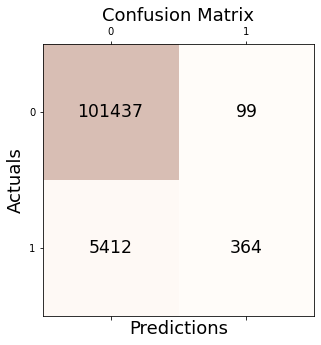

In [480]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

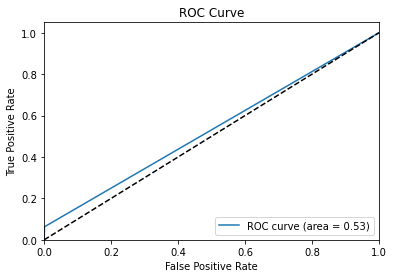

In [481]:
from sklearn.metrics import roc_curve,auc

fpr,tpr,_=roc_curve(y_test,predictions)

roc_auc=auc(fpr,tpr)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [482]:
y_train_pred = model.predict(X_train)
print("Accuracy: ", accuracy_score(y_train, y_train_pred))
print("Recall: ", recall_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred))
print("F1 Score:", f1_score(y_train, y_train_pred))

Accuracy:  0.9498937677053825
Recall:  0.05067567567567568
Precision: 0.8823529411764706
F1 Score: 0.09584664536741215


In [483]:
y_test_pred = model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_test_pred))
print("Recall: ", recall_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("F1 Score:", f1_score(y_test, y_test_pred))

Accuracy:  0.9486450723125093
Recall:  0.06301939058171745
Precision: 0.7861771058315334
F1 Score: 0.11668536624459047


In [484]:
from sklearn.linear_model import LogisticRegression

In [485]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

LogisticRegression()

In [486]:
predictions = logisticRegr.predict(X_test)

In [487]:
score = logisticRegr.score(X_test, y_test)
print(score)

0.9461756373937678


In [488]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictions)

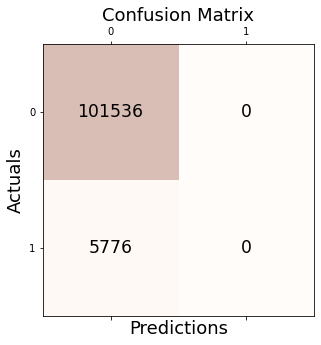

In [489]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

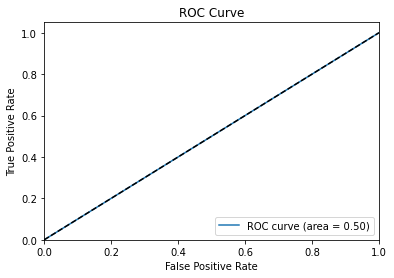

In [490]:
from sklearn.metrics import roc_curve,auc

fpr,tpr,_=roc_curve(y_test,predictions)

roc_auc=auc(fpr,tpr)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [491]:
y_train_pred = model.predict(X_train)
print("Accuracy: ", accuracy_score(y_train, y_train_pred))
print("Recall: ", recall_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred))
print("F1 Score:", f1_score(y_train, y_train_pred))

Accuracy:  0.9498937677053825
Recall:  0.05067567567567568
Precision: 0.8823529411764706
F1 Score: 0.09584664536741215


In [492]:
y_test_pred = model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_test_pred))
print("Recall: ", recall_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("F1 Score:", f1_score(y_test, y_test_pred))

Accuracy:  0.9486450723125093
Recall:  0.06301939058171745
Precision: 0.7861771058315334
F1 Score: 0.11668536624459047


# END FOR NOW #